# Chainlearn

Some examples on the things you can do...
Suppose you have some high-dimensional data and want to quickly inspect it by a typical PCA-TSNE projection, followed by a quick KMeans. You would have to do something like the following.

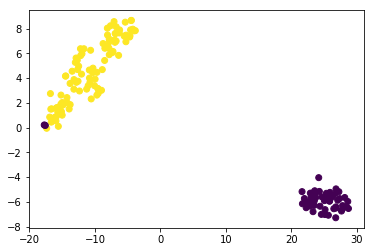

In [1]:
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE 
from sklearn.cluster import KMeans
 
iris = sns.load_dataset('iris')
iris_no_species = iris.drop('species', axis=1)
 
pca = PCA(n_components=3)
tsne = TSNE(n_components=2)

kmeans = KMeans(n_clusters=2)

cluster_labels = kmeans.fit_predict(iris_no_species)

transformed = tsne.fit_transform(pca.fit_transform(iris_no_species))

plt.scatter(transformed[:, 0], transformed[:, 1], c=cluster_labels)

You can shorten this and "tidy" it up by importing chainlearn -- the appropriate sklearn models will be appended to the `DataFrame` and `Series` classes.

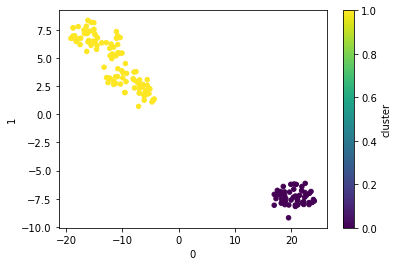

In [2]:
import pandas as pd
import seaborn as sns
import chainlearn

iris = sns.load_dataset('iris')

(iris
 .drop('species', axis=1)
 .learn.PCA(n_components=3)
 .learn.TSNE(n_components=2)
 .assign(
     cluster=lambda df: df.learn.KMeans(n_clusters=2)
 )
 .plot
 .scatter(
     x=0, 
     y=1, 
     c='cluster',
     cmap=plt.get_cmap('viridis')
 )
);

You can also do supervised learning, regressions, etc...

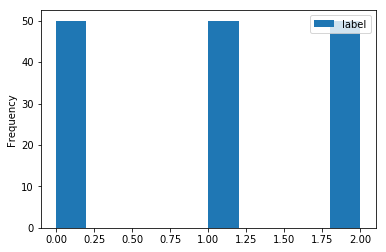

In [3]:
(iris
 .assign(
     species=lambda df: df['species'].learn.LabelEncoder()
 )
 .learn.RandomForestClassifier(
     n_estimators=100,
     target='species'
 )
 .rename(columns={0: 'label'})
 .plot
 .hist()
)

## Explain

There's an `explain` method that can be used to extract whatever information, be it coefficients or feature importances, from the model 

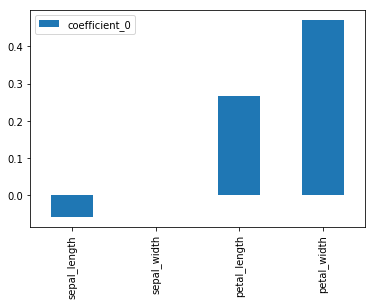

In [10]:

(iris
 .assign(
     species=lambda df: df['species'].learn.LabelEncoder()
 )
 .learn.Lasso(alpha=0.01, target='species')
 .learn.explain()
 .plot
 .bar()
);

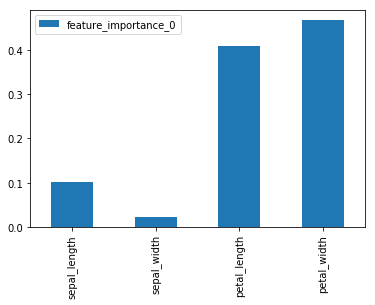

In [11]:
(iris
 .assign(
     species=lambda df: df['species'].learn.LabelEncoder()
 )
 .learn.RandomForestClassifier(
     n_estimators=100, 
     target='species'
 )
 .learn.explain()
 .plot
 .bar()
);

## Cross-validate

Additionally, a cross-validate function runs cross-validation on the chained model.

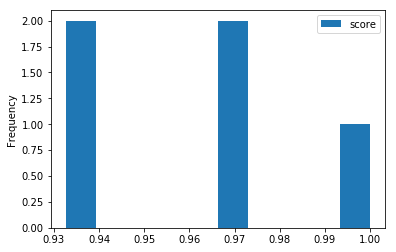

In [12]:
(iris
 .assign(
     species=lambda df: df['species'].learn.LabelEncoder()
 )
 .learn.RandomForestClassifier(
     n_estimators=100,
     target='species'
 )
 .learn.cross_validate(folds=5, scoring='f1_macro')
 .plot
 .hist()
);